In [1]:
import Launch_simu as ls
import numpy as np
import matplotlib.pyplot as plt
import importlib
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

In [60]:
EndDevices = np.loadtxt("Results_Simu/endDevicesPositions.txt", dtype=float)
print("Shape of end devices file : " + str(np.shape(EndDevices)))
Gateways   = np.loadtxt("Results_Simu/gatewaysPositions.txt", dtype=float)
print("Shape of gateways file    : " + str(np.shape(Gateways)))
Parameters = np.loadtxt("Results_Simu/parameters.txt", dtype=float)
x_end         = EndDevices[:,0]
y_end         = EndDevices[:,1]
sf_end        = EndDevices[:,3]

x_gat         = Gateways[:,0]
y_gat         = Gateways[:,1]

range_gat       = Parameters[0]
sensing_radius  = Parameters[1]
field_x         = Parameters[2]
field_y         = Parameters[3]

print(np.unique(sf_end))

Shape of end devices file : (8787, 4)
Shape of gateways file    : (14, 3)
[ 7.  8.  9. 10. 11. 12.]


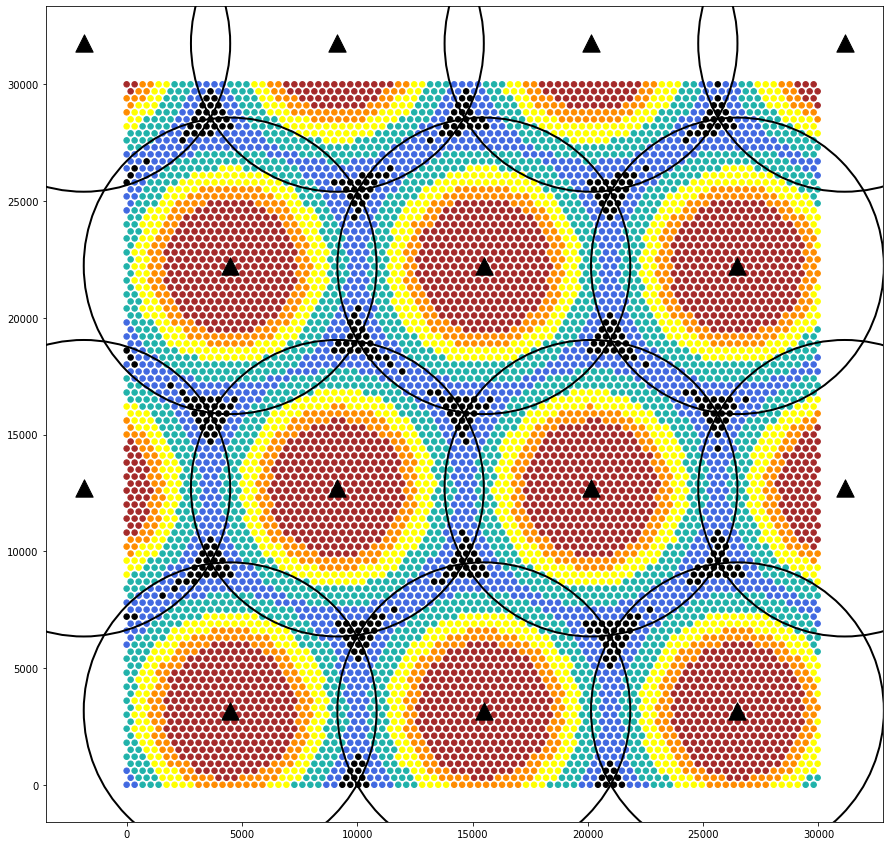

In [65]:
fig, ax = plt.subplots(figsize=(15,15))
cmap = ListedColormap(["brown", "darkorange",'yellow','limegreen','lightseagreen','royalblue', 'black'])
plt.scatter(x_end,y_end, s=30,c = sf_end, cmap = cmap)
plt.scatter(x_gat,y_gat, s=300, marker='^', color= 'black')

for i in range(len(x_gat)):
        circle1 = plt.Circle([x_gat[i],y_gat[i]], range_gat, color = 'b',ec='black', fill=False,alpha=1.0,linewidth=2)
        ax.add_artist(circle1)
plt.show()

In [62]:
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(x_end,y_end, s=30)
plt.scatter(x_gat,y_gat, s=100)

for i in range(len(x_gat)):
        circle1 = plt.Circle([x_gat[i],y_gat[i]], range_gat, color = 'b',ec='black', fill=False,alpha=1.0,linewidth=2)
        ax.add_artist(circle1)

for i in range(len(x_end)):
        circle1 = plt.Circle([x_end[i],y_end[i]], sensing_radius, color = 'b',ec='black', fill=False,alpha=.3,linewidth=2)
        ax.add_artist(circle1)
plt.show()

KeyboardInterrupt: 

In [48]:
maxPktPerHour    = 50
stepPktPerHour   = 5
uniquePktPerHour = 5

maxSensingRadius  = 150
stepSensingRadius = 25
minSensingRadius  = 50

gat_range = 3000
fieldSizeX = 10000
fieldSizeY = 10000
simulationTime = 3600
periodSenderUnique = 100
runs = 1

pktPerHour   = np.arange(1, maxPktPerHour, step= stepPktPerHour, dtype='float')

SensingRadius= np.arange(minSensingRadius, maxSensingRadius, step= stepSensingRadius, dtype='float')

params = {
    'sensing_radius': [SensingRadius],
    'simulationTime': [simulationTime],#♣[round(i, 4) for i in periodSender],
    'fieldSizeX' : [fieldSizeX],
    'fieldSizeY' : [fieldSizeY], 
    'range' : [gat_range], 
    'lambda' : [uniquePktPerHour], 
    'logPositions': [0],
    'packetSize': [50],
    'maxReceptionPaths': [8],
}

Result_FileName = 'Test-sensing-LoRa-PktPerHour-Grid'
script = ['SensingCircleLoRaPoisson','SensingGridLoRaPoisson']
get_AllRun=False

In [49]:
importlib.reload(ls)
ls.launch_simu(script[1], 
            params, 
            Result_FileName, 
            result_Header = 9,
            runs=runs, 
            optimized= True,
            show_progess=True,
            get_AllRun=get_AllRun,
            max_processes= 12,
            )

The script for the simulation is : /build/src/lorawan/examples/ns3-dev-SensingGridLoRaPoisson-optimized
Number of CPU on this machine   : 24
Number of CPU that will be used : 12


Running sim.: 100%|██████████| 50/50 [00:08<00:00,  5.89sim./s]

Execution time of the simulations is 8.52 [s]


In [51]:
Result_FileName_ToProcess = Result_FileName
params_values, Results = ls.get_Results(params,Result_FileName_ToProcess,get_AllRun=get_AllRun)
print(np.shape(Results))

(10, 1, 1, 1, 1, 1, 1, 1, 1, 9)


IndexError: index 1 is out of bounds for axis 0 with size 1

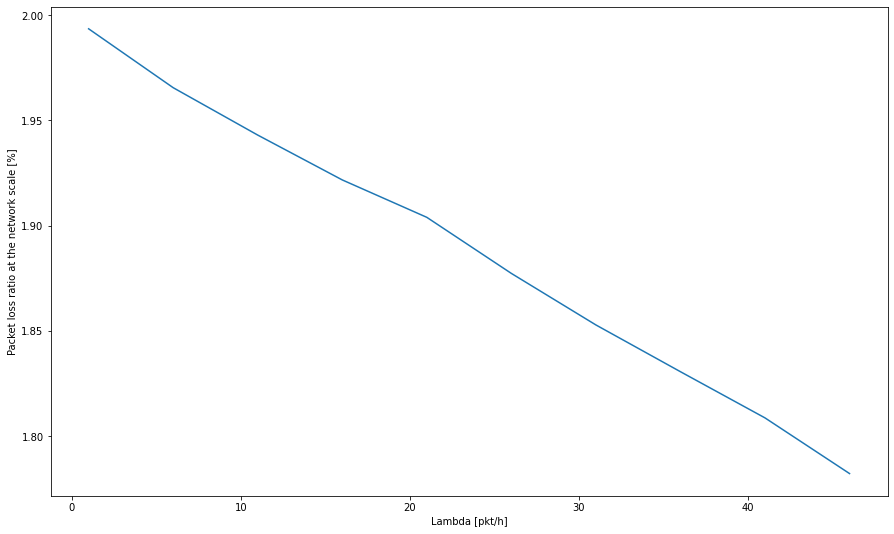

In [10]:
if get_AllRun : 
    n          = np.mean(Results[:,0,0,0,0,:,0,0,0,:,0],axis=2) 
    pktApp     = np.mean(Results[:,0,0,0,0,:,0,0,0,:,1],axis=2)
    pktDuty    = np.mean(Results[:,0,0,0,0,:,0,0,0,:,2],axis=2)
    pktSentP   = np.mean(Results[:,0,0,0,0,:,0,0,0,:,3],axis=2)
    pktNoDemod = np.mean(Results[:,0,0,0,0,:,0,0,0,:,4],axis=2)
    pktInterf  = np.mean(Results[:,0,0,0,0,:,0,0,0,:,5],axis=2)
    pktRecP    = np.mean(Results[:,0,0,0,0,:,0,0,0,:,6],axis=2)
    pktRecN    = np.mean(Results[:,0,0,0,0,:,0,0,0,:,7],axis=2)
else:
    n          = Results[:,0,0,0,0,:,0,0,0,0] 
    pktApp     = Results[:,0,0,0,0,:,0,0,0,1]
    pktDuty    = Results[:,0,0,0,0,:,0,0,0,2]
    pktSentP   = Results[:,0,0,0,0,:,0,0,0,3]
    pktNoDemod = Results[:,0,0,0,0,:,0,0,0,4]
    pktInterf  = Results[:,0,0,0,0,:,0,0,0,5]
    pktRecP    = Results[:,0,0,0,0,:,0,0,0,6]
    pktRecN    = Results[:,0,0,0,0,:,0,0,0,7]

fig, ax1 = plt.subplots(figsize=(15,9))
ax1.set_xlabel('Lambda [pkt/h]')
ax1.set_ylabel('Packet loss ratio at the network scale [%]')
for q in range(len(SensingRadius)):
    ax1.plot(pktPerHour,pktRecP[q,:]/pktSentP[q,:],  label = "SensingRadius= "+str(SensingRadius[q]))
ax1.grid()
ax1.grid()
ax1.tick_params(axis='y')
fig.legend()
plt.show()

fig, ax1 = plt.subplots(figsize=(15,9))
ax1.set_xlabel('Sensing radius [m]')
ax1.set_ylabel('Packet loss ratio at the network scale [%]')
for q in range(len(pktPerHour)):
    ax1.plot(SensingRadius,pktRecP[:,q]/pktSentP[:,q],  label = "Lambda= "+str(pktPerHour[q]))
ax1.grid()
ax1.grid()
ax1.tick_params(axis='y')
fig.legend()
plt.show()

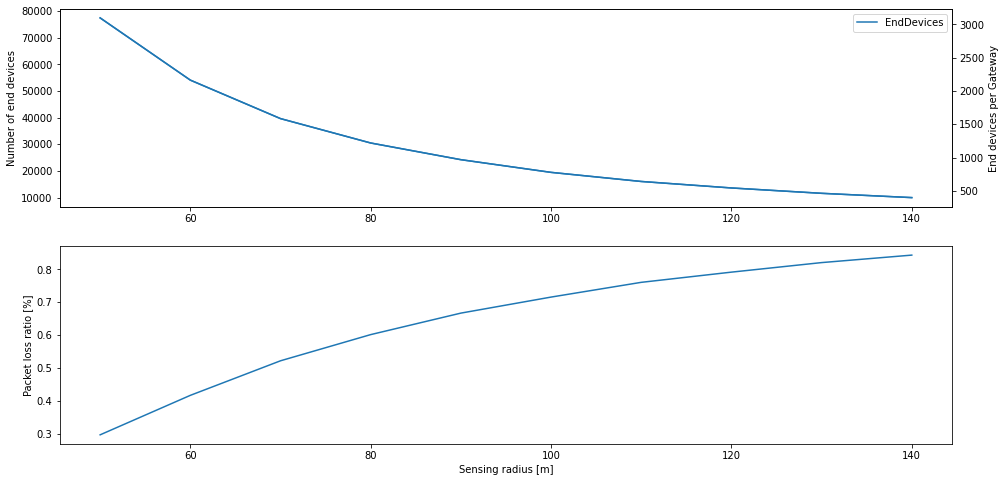

In [52]:
if get_AllRun : 
    nEnd       = np.mean(Results[:,0,0,0,0,0,0,0,0,:,0],axis=1) 
    nGat       = np.mean(Results[:,0,0,0,0,0,0,0,0,:,1],axis=1) 
    pktApp     = np.mean(Results[:,0,0,0,0,0,0,0,0,:,2],axis=1)
    pktDuty    = np.mean(Results[:,0,0,0,0,0,0,0,0,:,3],axis=1)
    pktSentP   = np.mean(Results[:,0,0,0,0,0,0,0,0,:,4],axis=1)
    pktNoDemod = np.mean(Results[:,0,0,0,0,0,0,0,0,:,5],axis=1)
    pktInterf  = np.mean(Results[:,0,0,0,0,0,0,0,0,:,6],axis=1)
    pktRecP    = np.mean(Results[:,0,0,0,0,0,0,0,0,:,7],axis=1)
    pktRecN    = np.mean(Results[:,0,0,0,0,0,0,0,0,:,8],axis=1)
else:
    nEnd       = Results[:,0,0,0,0,0,0,0,0,0] 
    nGat       = Results[:,0,0,0,0,0,0,0,0,1] 
    pktApp     = Results[:,0,0,0,0,0,0,0,0,2]
    pktDuty    = Results[:,0,0,0,0,0,0,0,0,3]
    pktSentP   = Results[:,0,0,0,0,0,0,0,0,4]
    pktNoDemod = Results[:,0,0,0,0,0,0,0,0,5]
    pktInterf  = Results[:,0,0,0,0,0,0,0,0,6]
    pktRecP    = Results[:,0,0,0,0,0,0,0,0,7]
    pktRecN    = Results[:,0,0,0,0,0,0,0,0,8]

fig, ax = plt.subplots(2,1,figsize=(16,8))
ax[1].set_xlabel('Sensing radius [m]')
ax[0].set_ylabel('Number of end devices')  # we already handled the x-label with ax1
ax[0].plot(SensingRadius,nEnd, label = "EndDevices")

ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(SensingRadius, nEnd/nGat, label = "Gateways")
ax2.set_ylabel('End devices per Gateway') 
ax[0].legend()

ax[1].set_ylabel('Packet loss ratio [%]')
ax[1].plot(SensingRadius,pktRecN/pktSentP)
plt.show()

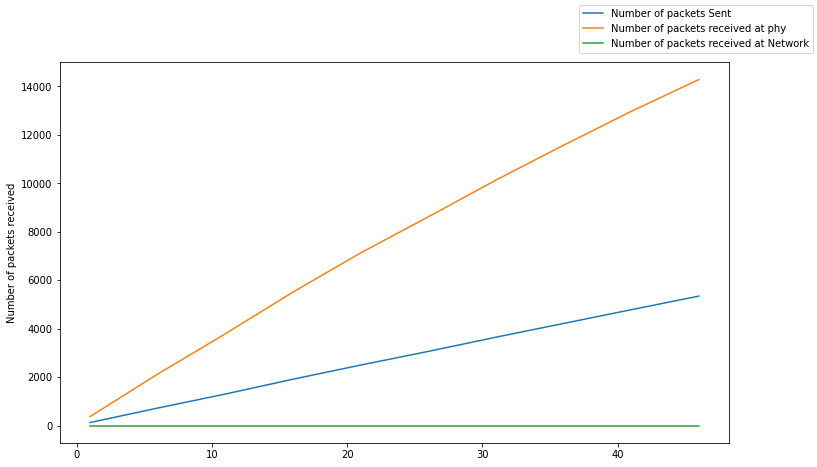

[ 123.6  719.8 1298.8 1910.8 2494.  3057.4 3643.8 4211.6 4777.8 5339.6]
[  369.6  2122.2  3785.4  5508.   7122.6  8609.4 10126.8 11564.4 12961.8
 14274. ]
[1.2000e+00 3.7200e+01 1.1100e+02 2.2440e+02 3.5940e+02 5.6280e+02
 8.0460e+02 1.0704e+03 1.3716e+03 1.7448e+03]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
if get_AllRun : 
    n          = np.mean(Results[0,0,0,0,0,:,0,0,0,:,0],axis=2)
    pktApp     = np.mean(Results[0,0,0,0,0,:,0,0,0,:,1],axis=1)
    pktDuty    = np.mean(Results[0,0,0,0,0,:,0,0,0,:,2],axis=1)
    pktSentP   = np.mean(Results[0,0,0,0,0,:,0,0,0,:,3],axis=1)
    pktNoDemod = np.mean(Results[0,0,0,0,0,:,0,0,0,:,4],axis=1)
    pktInterf  = np.mean(Results[0,0,0,0,0,:,0,0,0,:,5],axis=1)
    pktRecP    = np.mean(Results[0,0,0,0,0,:,0,0,0,:,6],axis=1)
    pktRecN    = np.mean(Results[0,0,0,0,0,:,0,0,0,:,7],axis=1)
else:
    n          = Results[0,0,0;0;0,:,0,0,0,0] 
    pktApp     = Results[0,0,0;0;0,:,0,0,0,1]
    pktDuty    = Results[0,0,0;0;0,:,0,0,0,2]
    pktSentP   = Results[0,0,0;0;0,:,0,0,0,3]
    pktNoDemod = Results[0,0,0;0;0,:,0,0,0,4]
    pktInterf  = Results[0,0,0;0;0,:,0,0,0,5]
    pktRecP    = Results[0,0,0;0;0,:,0,0,0,6]
    pktRecN    = Results[0,0,0;0;0,:,0,0,0,7]

fig, ax1 = plt.subplots(figsize=(12,7))

color = 'tab:red'
ax1.set_ylabel('Number of packets received')
ax1.plot(pktPerHour,pktSentP,  label = "Number of packets Sent")
ax1.plot(pktPerHour,pktRecP,  label = "Number of packets received at phy")
ax1.plot(pktPerHour,pktRecN,  label = "Number of packets received at Network")
ax1.tick_params(axis='y')
fig.legend()
plt.show()